In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

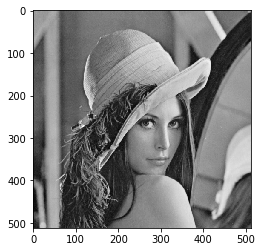

In [2]:
img = cv2.imread("./lena.jpg", 0)
plt.imshow(img, cmap="gray")
plt.show()

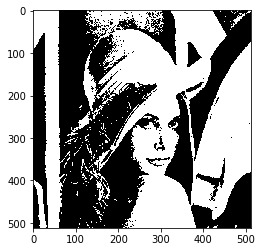

In [3]:
binaryImg = np.zeros((512, 512))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] < 128:
            binaryImg[i][j] = 0;
        else:
            binaryImg[i][j] = 255;
plt.imshow(binaryImg, cmap="gray")
plt.show()

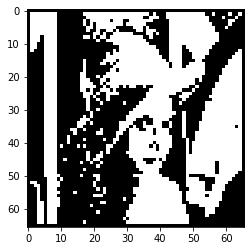

In [12]:
downSampleImg = np.zeros((66, 66))
for i in range(64):
    for j in range(64):
        downSampleImg[i+1][j+1] = binaryImg[i*8][j*8]
plt.imshow(downSampleImg, cmap="gray")
plt.show()

In [14]:
#https://slideplayer.com/slide/15387800/
def h(b, c, d, e):
    if b == c and (d != b or e != b):
        return 'q'
    elif b == c and (d == b and e == b):
        return 'r'
    else:
        return 's'

def f(a1, a2, a3, a4):
    if a1 == a2 == a3 == a4 == 'r':
        return 5
    else:
        count = 0
        if a1 == 'q':
            count += 1
        if a2 == 'q':
            count += 1
        if a3 == 'q':
            count += 1
        if a4 == 'q':
            count += 1
        return count

for i in range(64): # 1~65
    for j in range(64):
        # center = i+1, j+1
        if downSampleImg[i+1][j+1] == 255:
            a1 = h(downSampleImg[i+1][j+1], downSampleImg[i+1][j+2], downSampleImg[i][j+2], downSampleImg[i][j+1])
            a2 = h(downSampleImg[i+1][j+1], downSampleImg[i][j+1], downSampleImg[i][j], downSampleImg[i+1][j])
            a3 = h(downSampleImg[i+1][j+1], downSampleImg[i+1][j], downSampleImg[i+2][j], downSampleImg[i+2][j+1])
            a4 = h(downSampleImg[i+1][j+1], downSampleImg[i+2][j+1], downSampleImg[i+2][j+2], downSampleImg[i+1][j+2])
            print(f(a1, a2, a3, a4), end='')
        else:
            print(" ", end='')
        print(" ", end='')
    print()

1 1 1 1 1 1 1 1                 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1   1       1 1 1 1 1 1 1 1 1 1 1 1     0         0     0 
1 5 5 5 5 5 5 1                   1 1 5 5 5 5 1 1 1 5 1 1 1 1 5 5 1     2 3 1     1 1 5 5 5 5 5 5 5 5 5 1 1         0       0   
1 5 5 5 5 5 5 1                 1   2 1 1 5 5 1   1 5 1     1 5 5 1 2 2 2           1 5 5 5 5 5 5 5 5 5 5 1             2 1     
1 5 5 5 5 5 5 1                 1   2   1 5 5 1 1 2 1 1   1 2 1 5 1 1               1 5 5 5 5 5 5 5 5 5 5 1 1           1       
1 5 5 5 5 5 5 1                   2 2   2 1 1 1 1 1           1 1 1   1             1 5 5 5 5 5 5 5 5 5 5 5 1 1       0         
1 5 5 5 5 5 5 1                   1     2     1 1   1           1 1   2 2 1         1 5 5 5 5 5 5 5 5 5 5 5 5 1                 
1 5 1 1 1 5 5 1                       2 2   1     1 2 1 1 1 1         1 2   0       1 5 5 5 5 5 5 5 5 5 5 5 5 1 1               
1 5 1   1 5 5 1                 1 1   1   1 2   1 1 5 5 5 5 1 1 1 1     1           1 5 5 5 5 5 5